# <span class="tema">(Ordenar i cerca)</span> Sumatori parcial màxim

Donada una llista d’enters, trobar el sumatori parcial d'elements consecutius de valor màxim. 

Si el valor màxim és negatiu, el sumatori parcial màxim donarà 0

Indicacions:
+ Aquest algorisme es pot implementar de tres maneres. 
    + Força bruta $(O(n*n))$
    + Dividir i conquerir $(O(n log n))$
    + Algorisme de Kadane $(O(n))$

L'Algorisme Kadane consisteix en fer un únic recorregut per la llista, i anar acumulant el valor de la suma, amb la particularitat que si el que portem acumulat és negatiu, ho descartem.

Per exemple, a la llista [-1,0,3,4,-2,5]   aniriem acumulant -1 => és negatiu, descartem; 0, 3, 7, 5, 10

per no perdre màxims locals hem de mantenir dos valors: el valor acumulat fins a un punt i el valor màxim. A l'exemple:

- **[-1**, 0, 3, 4, -2, 5] acum:-1=>0, maxim:0;  
- **[-1, 0**, 3, 4, -2, 5] acum=0, màxim:0; 
- **[-1, 0, 3**, 4, -2, 5] acum:3, màxim:3; 
- **[-1, 0, 3, 4**, -2, 5] acum:7, màxim:7; 
- **[-1, 0, 3, 4, -2**, 5] acum:5, màxim:7; 
- **[-1, 0, 3, 4, -2, 5**] acum:10, màxim:10

### Conceptualització problema

#### Implementa les tres versions de la solució
    
**Fet** a la cel·la següent.
    
#### Calcula el cost de cadascuna
Suposem que $n$ denota la llargada de la llista.

- **Brute force**: Es recorre la un cop llista. En cada pas es torna a recorre la llista, fent operacions $O(1)$. Per tant, la complexitat total és $O(n^2)$.
- **Divide and conquer**: A partir dels [Master Theorem](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)), tenim que $T(n) = 2 \cdot T(\frac{n}{2}) + O(n)$, ja que dividim la llista en dos en cada pas recursiu. D'aquí es pot extreure que la complexitat final és $O(n \log (n))$.
- **Kadane**: $O(n)$, ja que només es recorre la llista un cop, fent operacion $O(1)$ en cada pas.

### Implementació

In [1]:
def sumatoriParcialMaximBrute(llista: list) -> int:
    max_acc, arr_len = 0, len(llista)
    
    # We iterate over all the possible subarrays
    
    for i in range(arr_len):
        for j in range(i+1, arr_len+1):
            
            # Compute the sum of the substring
            # and update the max
            
            tmp_acc = sum(llista[i:j])
            
            if tmp_acc > max_acc:
                max_acc = tmp_acc
    
    return max_acc

def sumatoriParcialMaximDivide(llista: list) -> int:
    
    # Base cases
    # If array contains only one element
    
    if len(llista) == 0:
        return 0
    
    if len(llista) == 1:
        return llista[0] if llista[0] > 0 else 0

    # Find the middle element of the array
    
    mid = len(llista) // 2

    # Find the max. subarray sum 
    # for the left subarray
    
    acc_left, max_left = 0, -1e+9
    
    for n in reversed(llista[:mid]): 
        acc_left += n
        
        if acc_left > max_left:
            max_left = acc_left

    # Find maximum subarray sum 
    # for the right subarray
    
    acc_right, max_right = 0, -1e+9
    
    for n in llista[mid:]: 
        acc_right += n
        
        if acc_right > max_right:
            max_right = acc_right


    # Recurssion step
    
    max_lr = max(
        sumatoriParcialMaximDivide(llista[:mid]), 
        sumatoriParcialMaximDivide(llista[mid:]))
    
    # Return de max from the sides 
    # and middle segments
    
    max_acc = max(max_lr, max_left + max_right)
    return max_acc if max_acc > 0 else 0
        
def sumatoriParcialMaxim(llista: list) -> int:
    acc, max_acc = 0, 0
    
    for n in llista:
        # Add the actual element
        
        acc += n
        
        # If the partial sum is negative,
        # we reset it
        
        if acc < 0:
            acc = 0
        
        # Update the max sum value
        
        if acc > max_acc:
            max_acc = acc
    
    return max_acc

In [2]:
def prettySumatoriParcialMaxim(llista: list) -> None:
    max_sum = sumatoriParcialMaxim(llista)
    print(f"sumatoriParcialMaxim({llista}) = {max_sum}")
    
prettySumatoriParcialMaxim([-3, 1, -5, 2, 7, 8])

sumatoriParcialMaxim([-3, 1, -5, 2, 7, 8]) = 17


### Testeig

#### Exemple
```python
sumatoriParcialMaxim([-3, 1, -5, 2, 7, 8]) # ha de retornar 17
```

In [3]:
from random import randint

test_arr, arr_res     = [-3, 1, -5, 2, 7, 8], 17
test_arr_2, arr_res_2 = [-1, 0, 3, 4, -2, 5], 10

# Test for known results

print("Tests cases #1: Known results")
assert sumatoriParcialMaxim(test_arr) == arr_res
assert sumatoriParcialMaxim(test_arr_2) == arr_res_2
print("Ran 2 tests ... OK\n")


# Test that the three functions have the same outputs

TEST_CASES = 100
print("Tests cases #2: Random")

for i in range(TEST_CASES):
    
    # Generate random array of ints
    # and get the target max value based on
    # the Kadane algorithm
    
    arr = [randint(-1e+3, 1e+3) for _ in range(0, randint(1, 1e+2))]
    target = sumatoriParcialMaxim(arr)
        
    # Test the results are equal for all
    # the functions
        
    assert target == sumatoriParcialMaximBrute(arr)
    assert target == sumatoriParcialMaximDivide(arr)
        
print(f"Ran {2*TEST_CASES} tests ... OK")

Tests cases #1: Known results
Ran 2 tests ... OK

Tests cases #2: Random
Ran 200 tests ... OK


### Benchmark & performance

Utilitzaré la llibreria `matplotlib` per veure com creix el temps d'execució usant els tres algoritmes implementats.

              total (s)	mean (s)
Brute force   4.998596	0.016662
Divide & con. 0.112085	0.000374
Kadane        0.004815	0.000016


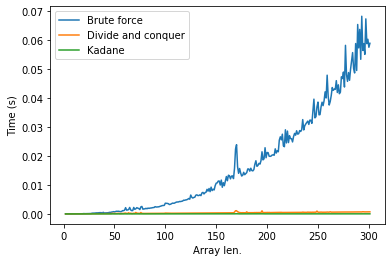

In [4]:
from time import time
from matplotlib import pyplot as plt

%matplotlib inline

TEST_CASES, BASE = 300, 1

ns = []
t_brute, t_divide, t_kadane = [], [], []

for i in range(TEST_CASES):
    arr = [randint(-1e+3, 1e+3) for _ in range(BASE)]
    BASE += 1
    
    ns.append(BASE)
    
    t = time()
    _ = sumatoriParcialMaximBrute(arr)
    t_brute.append(time() - t)
    
    t = time()
    _ = sumatoriParcialMaximDivide(arr)
    t_divide.append(time() - t)
    
    t = time()
    _ = sumatoriParcialMaxim(arr)
    t_kadane.append(time() - t)

t_brute_sum = sum(t_brute)
t_divide_sum = sum(t_divide)
t_kadane_sum = sum(t_kadane)

t_brute_mean = t_brute_sum / TEST_CASES
t_divide_mean = t_divide_sum / TEST_CASES
t_kadane_mean = t_kadane_sum / TEST_CASES

print("              total (s)\tmean (s)")
print(f"Brute force   {t_brute_sum:2.6f}\t{t_brute_mean:2.6f}")
print(f"Divide & con. {t_divide_sum:2.6f}\t{t_divide_mean:2.6f}")
print(f"Kadane        {t_kadane_sum:2.6f}\t{t_kadane_mean:2.6f}")


# Matplotlib stuff

plt.plot(ns, t_brute, label="Brute force")
plt.plot(ns, t_divide, label="Divide and conquer")
plt.plot(ns, t_kadane, label="Kadane")
plt.xlabel("Array len.")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

### Avaluació (0 a 10 punts)


Concepte | Puntuació 
--- | --- 
Solució correcta força bruta | **3** punt
Solució correcta i eficient Kadane | **4** punt
Solució correcta i eficient  dividir i vencer | **2** punt
Solució correcta no eficient | **2** punts 
Codi comentat i seguint estàndar PEP8 | **+1** punt 
S'ofereix una funció adicional per mostrar la solució elegantment| **+0.5** punts 
L'algorisme falla repetidament | **-7** punts 
L'algorisme falla en algun cas excepcional | **-4** punt
No es donen prous exemples d'execució | **-1** punt
Codi, noms de variables, solució o comentaris no prou clars | **-1** punt
La funció o els paràmetres no s'anomenen com a l'exemple | **-1** punt